### <i> Leveraging Machine Learning to Explore the Role of Digital Finance in Enhancing Urban Economic Resilience in the USA </i>
### <i> Dataset Link --> https://www.kaggle.com/datasets/jocelyndumlao/digital-finance-on-urban-economic-resilience </i>
### <i> Import Library Files </i>

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")


### <i> Load The Dataset </i>

In [4]:
data = pd.read_excel("The Impact of Digital Finance on Urban Economic Resilience.xlsx")
data

,id,regin,adm,sou,pop,code,year,res,dif,gov,...,eng,green,ent,elec,app,res1,dif_breadth,inno,adv,human
0,1,东部,省会城市,北方城市,2024.000,110000,2011,0.430915,4.391729,0.184980,...,0.1565,0.5159,1.5330,6.7114,201.581,0.575055,4.568921,1.37914,7.52780,1.050420
1,1,东部,省会城市,北方城市,2078.000,110000,2012,0.541096,4.910668,0.185405,...,0.1692,0.5192,1.2920,6.7734,244.162,0.647204,5.033570,1.59382,7.53401,1.029630
2,1,东部,省会城市,北方城市,2125.000,110000,2013,0.659760,5.187218,0.187744,...,0.1696,0.5111,1.3159,6.8169,256.325,0.663190,5.198000,1.83204,7.54042,1.019880
3,1,东部,省会城市,北方城市,2171.000,110000,2014,0.782583,5.250597,0.188795,...,0.1715,0.6041,1.7863,6.8427,305.685,0.497652,5.366350,1.98969,7.55946,1.007550
4,1,东部,省会城市,北方城市,2188.000,110000,2015,0.905581,5.403623,0.205255,...,0.1858,0.6050,1.8592,6.8593,301.219,0.657952,5.462135,2.12049,7.58887,0.997792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3119,284,西部,非省会城市,北方城市,44.280,650200,2017,1.110030,5.480722,0.117461,...,0.2383,0.4305,2.3274,3.8844,219.355,0.248238,5.471766,-4.17339,6.63095,0.998208
3120,284,西部,非省会城市,北方城市,44.910,650200,2018,1.238740,5.516087,0.111882,...,0.2307,0.4329,2.0674,4.1788,251.613,0.249022,5.540479,-4.09235,6.61083,1.042200
3121,284,西部,非省会城市,北方城市,46.230,650200,2019,1.377550,5.567161,0.108672,...,0.2224,0.4255,2.5058,4.2443,216.129,0.221141,5.600050,-4.06868,6.65428,1.176210
3122,284,西部,非省会城市,北方城市,46.000,650200,2020,1.432230,5.610826,0.089390,...,0.1711,0.4400,2.0390,4.3218,209.524,0.252920,5.651295,-3.94248,6.63399,1.277000


### <i> Dataset OVerview </i>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3124 entries, 0 to 3123
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           3124 non-null   int64  
 1   regin        3124 non-null   object 
 2   adm          3124 non-null   object 
 3   sou          3124 non-null   object 
 4   pop          3124 non-null   float64
 5   code         3124 non-null   int64  
 6   year         3124 non-null   int64  
 7   res          3124 non-null   float64
 8   dif          3124 non-null   float64
 9   gov          3124 non-null   float64
 10  trade        3123 non-null   float64
 11  med          3124 non-null   float64
 12  eng          3123 non-null   float64
 13  green        3124 non-null   float64
 14  ent          3124 non-null   float64
 15  elec         3124 non-null   float64
 16  app          3124 non-null   float64
 17  res1         3124 non-null   float64
 18  dif_breadth  3124 non-null   float64
 19  inno  

In [7]:
data.describe()

,id,pop,code,year,res,dif,gov,trade,med,eng,green,ent,elec,app,res1,dif_breadth,inno,adv,human
count,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3123.000000,3124.000000,3123.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000,3124.000000
mean,142.500000,452.152419,378604.929577,2016.000000,1.551033,5.110056,0.077424,0.016797,9.678923,0.135576,0.402547,1.302415,4.042791,108.244994,0.249466,5.048961,-2.761965,6.537658,0.111615
std,81.996355,359.761694,139260.535271,3.162784,0.643832,0.520799,0.027134,0.018419,0.724012,0.149592,0.090401,1.190148,1.134072,76.739577,0.083915,0.576058,1.752116,0.348544,0.987882
min,1.000000,23.320000,110000.000000,2011.000000,-0.967220,2.834389,0.023432,0.000000,7.209300,0.008200,0.003600,0.159500,0.105100,13.893500,0.101114,0.631272,-7.824050,5.517480,-4.942880
25%,71.750000,231.950000,320375.000000,2013.000000,1.031312,4.870070,0.058588,0.003375,9.250925,0.061400,0.381800,0.681350,3.277450,72.618075,0.192469,4.826432,-4.029967,6.307132,-0.493456
50%,142.500000,354.650000,371550.000000,2016.000000,1.484855,5.279135,0.072599,0.011382,9.669050,0.105500,0.409800,0.999650,4.000350,89.905050,0.227859,5.197668,-2.949805,6.522285,0.098925
75%,213.250000,561.470000,450625.000000,2019.000000,2.006470,5.484548,0.092073,0.023446,10.134950,0.158850,0.432125,1.464400,4.762800,116.512500,0.279587,5.441183,-1.629640,6.755465,0.708688
max,284.000000,3212.000000,650200.000000,2021.000000,4.084560,5.885215,0.227340,0.228677,12.090800,2.282600,3.765800,13.982200,7.467200,1016.560000,0.663190,5.918329,2.761880,7.656920,2.546650


### <i> Data Preprocessing </i>

In [9]:
# Drop the 'region', 'adm', and 'sou' columns
columns_to_drop = ['regin', 'adm', 'sou']
data = data.drop(columns=columns_to_drop, axis=1)

In [10]:
# Handle missing values (using mean imputation here)
imputer = SimpleImputer(strategy='mean')
data.iloc[:, :] = imputer.fit_transform(data)

print("\nDataset after handling missing values:")
print(data.head())


Dataset after handling missing values:
   id     pop    code  year       res       dif       gov     trade      med  \
0   1  2024.0  110000  2011  0.430915  4.391729  0.184980  0.028036  11.3805   
1   1  2078.0  110000  2012  0.541096  4.910668  0.185405  0.028397  11.4362   
2   1  2125.0  110000  2013  0.659760  5.187218  0.187744  0.027072  11.6551   
3   1  2171.0  110000  2014  0.782583  5.250597  0.188795  0.026036  11.5410   
4   1  2188.0  110000  2015  0.905581  5.403623  0.205255  0.035172  11.5583   

      eng   green     ent    elec      app      res1  dif_breadth     inno  \
0  0.1565  0.5159  1.5330  6.7114  201.581  0.575055     4.568921  1.37914   
1  0.1692  0.5192  1.2920  6.7734  244.162  0.647204     5.033570  1.59382   
2  0.1696  0.5111  1.3159  6.8169  256.325  0.663190     5.198000  1.83204   
3  0.1715  0.6041  1.7863  6.8427  305.685  0.497652     5.366350  1.98969   
4  0.1858  0.6050  1.8592  6.8593  301.219  0.657952     5.462135  2.12049   

       adv

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

### <i> Data Visulization And Analysis </i>

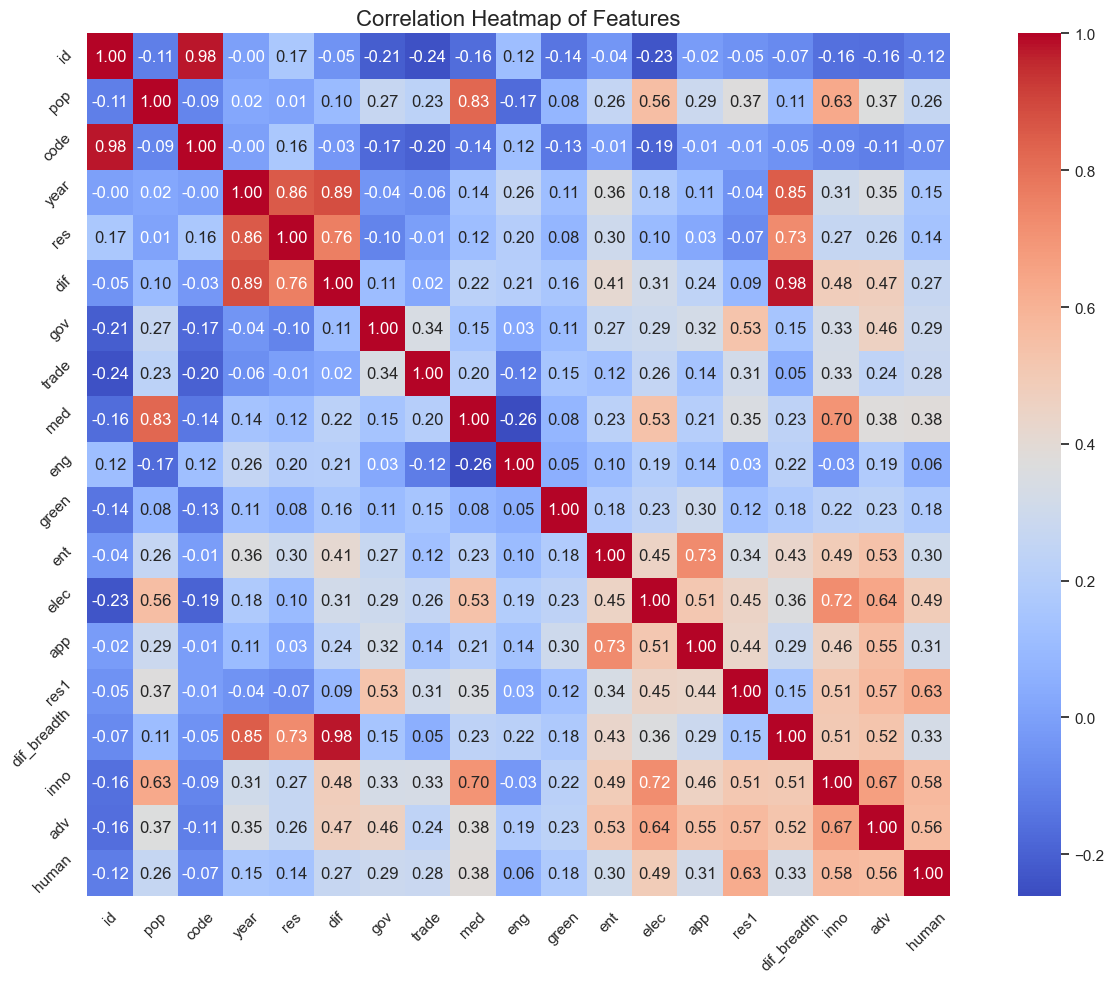

In [13]:
# Set a professional style for plots
sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)

#  Correlation Heatmap
plt.figure(figsize=(14, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

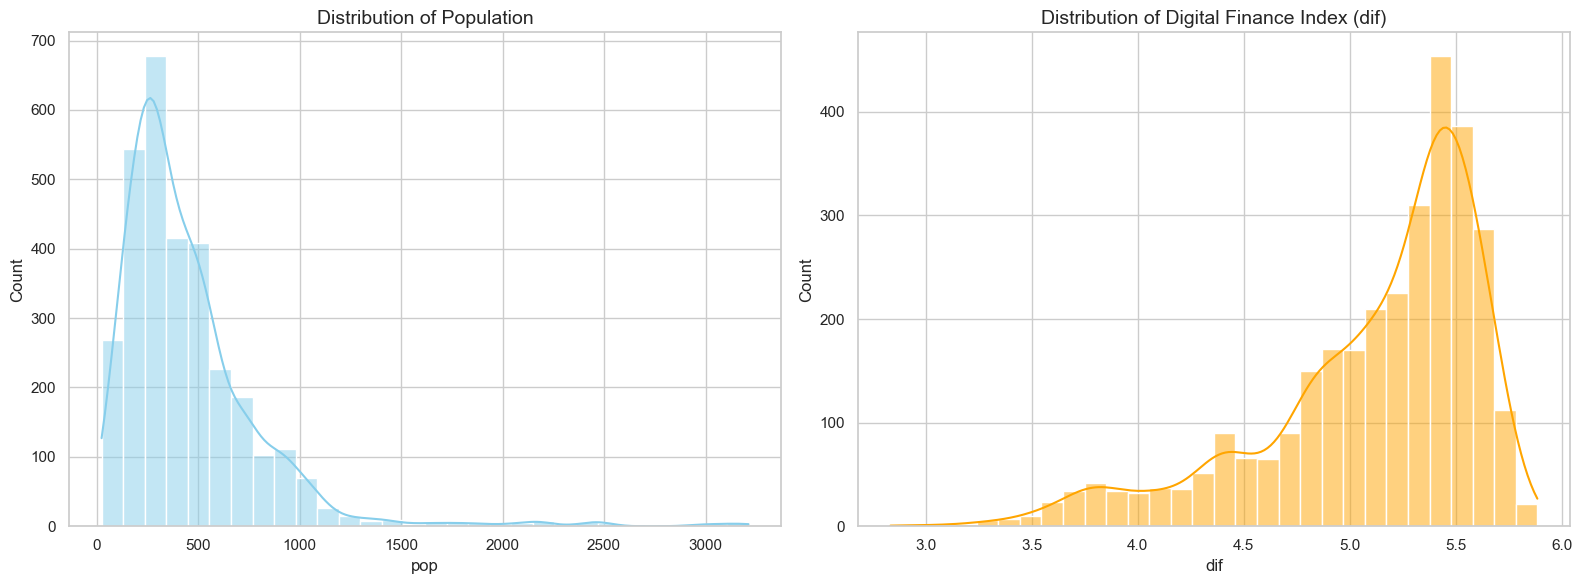

In [14]:
#  Distribution of Population and Digital Finance Index
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.histplot(data['pop'], kde=True, ax=axes[0], color="skyblue", bins=30)
axes[0].set_title('Distribution of Population', fontsize=14)
sns.histplot(data['dif'], kde=True, ax=axes[1], color="orange", bins=30)
axes[1].set_title('Distribution of Digital Finance Index (dif)', fontsize=14)
plt.tight_layout()
plt.show()

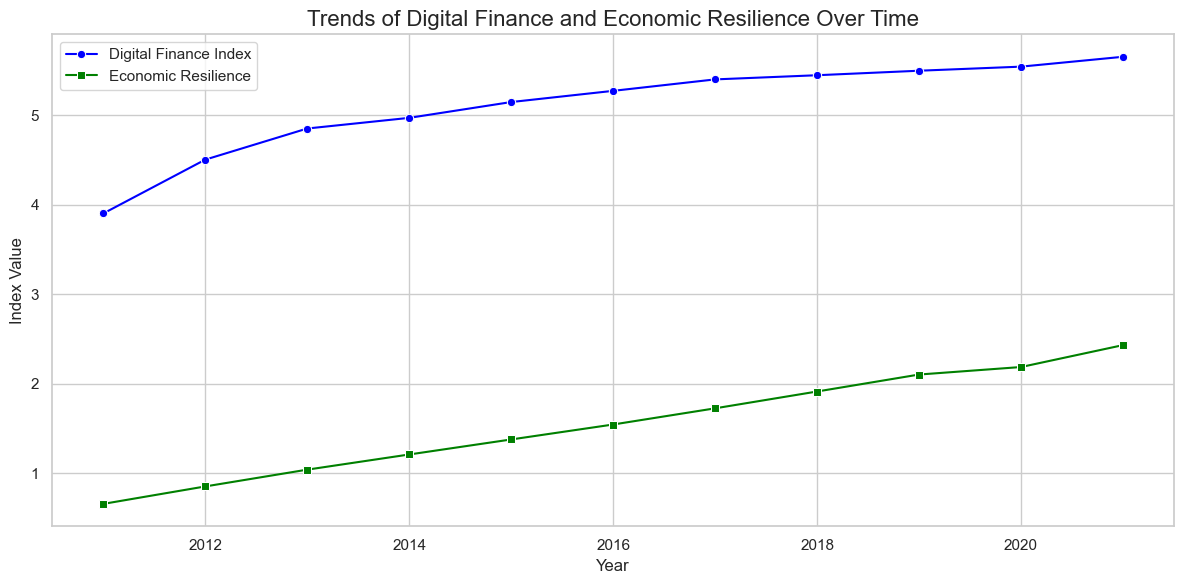

In [15]:
#  Trends Over Time: Digital Finance and Economic Resilience
avg_yearly = data.groupby('year').mean()
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_yearly, x=avg_yearly.index, y='dif', marker='o', label='Digital Finance Index', color='blue')
sns.lineplot(data=avg_yearly, x=avg_yearly.index, y='res', marker='s', label='Economic Resilience', color='green')
plt.title('Trends of Digital Finance and Economic Resilience Over Time', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Index Value', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

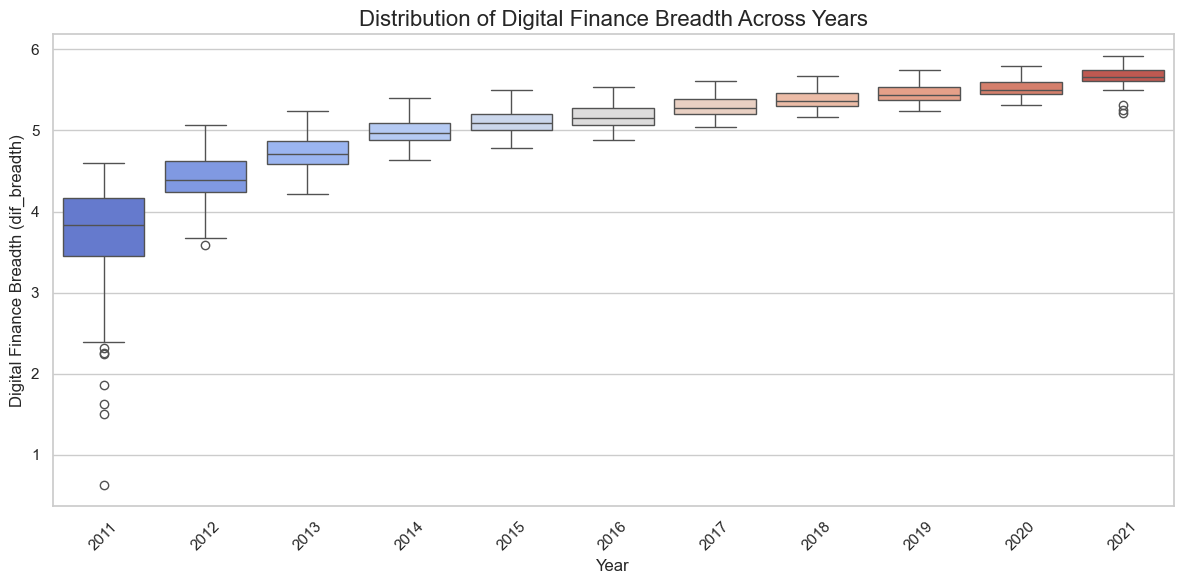

In [16]:
#  Boxplot: Digital Finance Breadth (dif_breadth) Across Years
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='year', y='dif_breadth', palette='coolwarm')
plt.title('Distribution of Digital Finance Breadth Across Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Digital Finance Breadth (dif_breadth)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

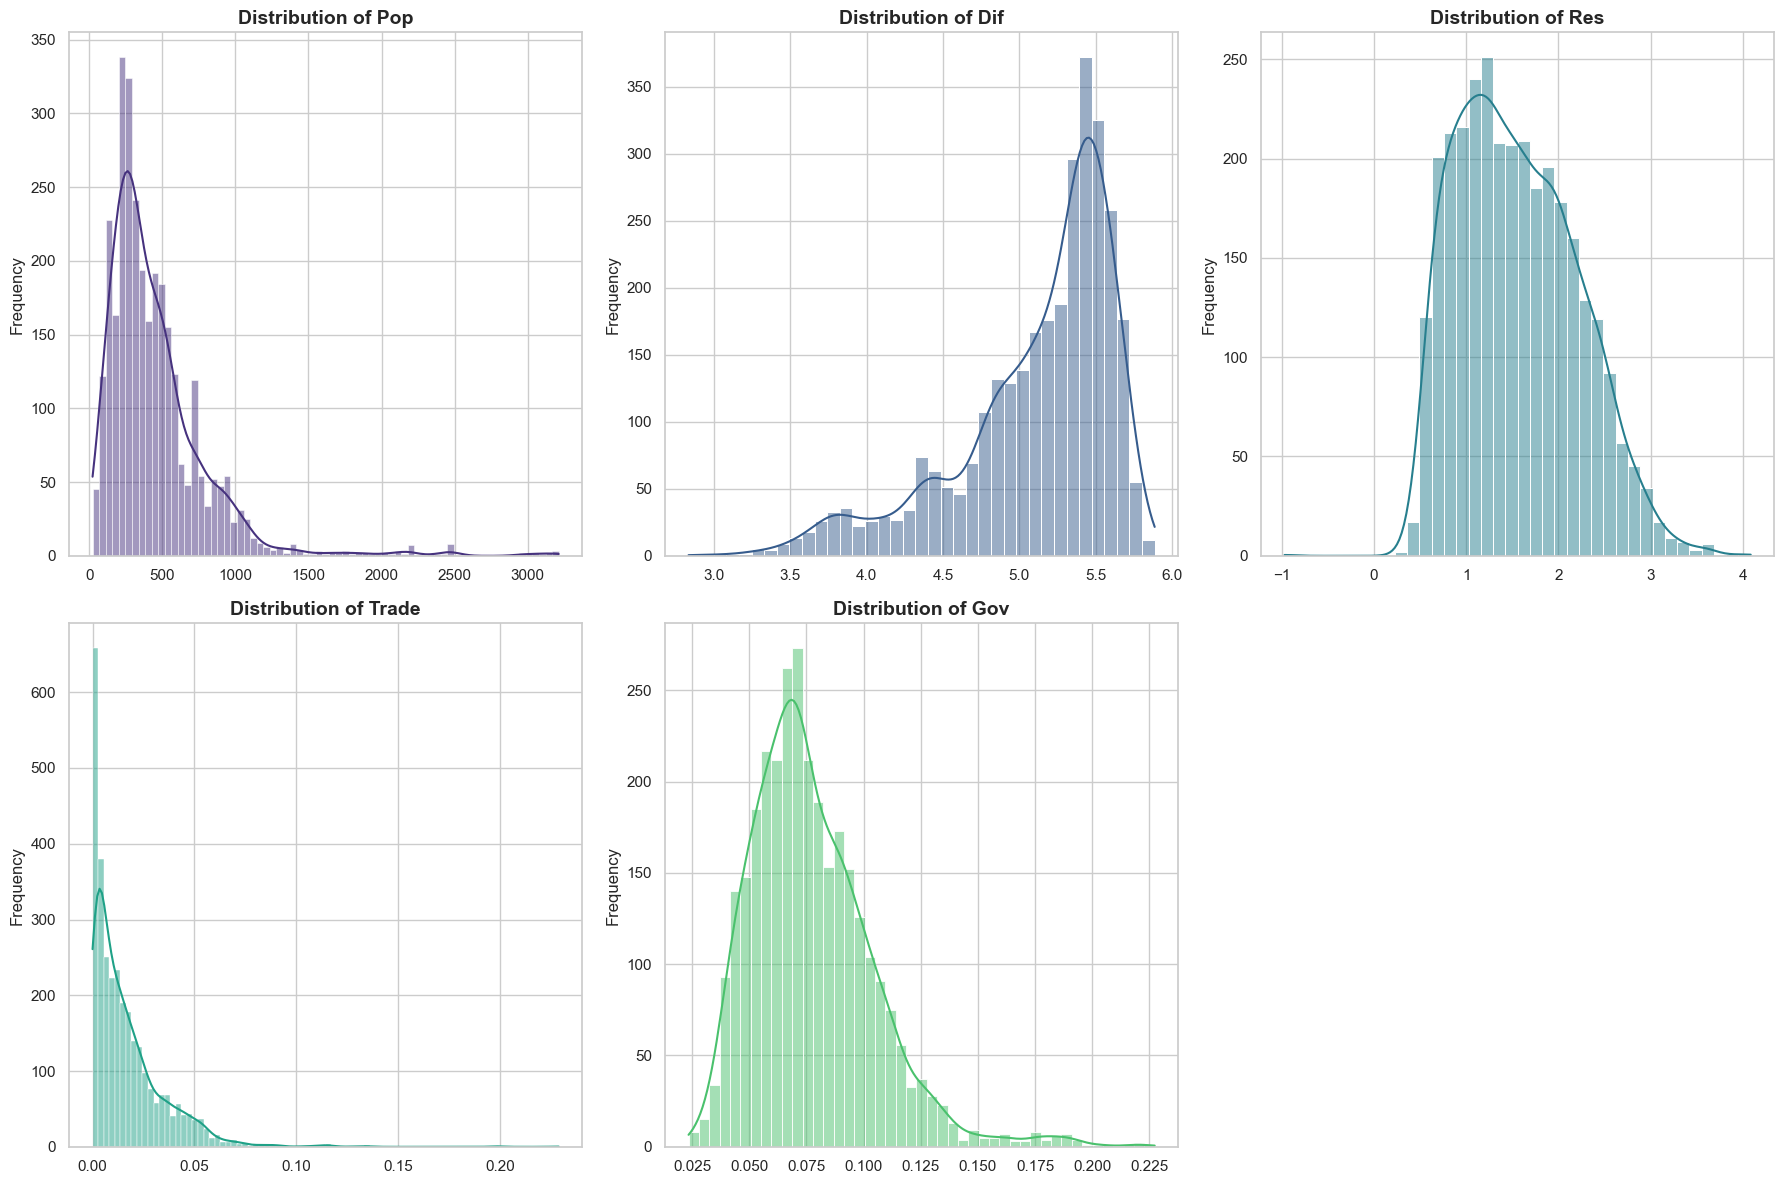

In [17]:
#  Distribution of Key Economic Indicators
features = ['pop', 'dif', 'res', 'trade', 'gov']
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.histplot(data[feature], kde=True, ax=axes[i], color=sns.color_palette("viridis")[i])
    axes[i].set_title(f'Distribution of {feature.capitalize()}', fontsize=14, weight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')
axes[-1].axis('off')
plt.tight_layout()
plt.show()

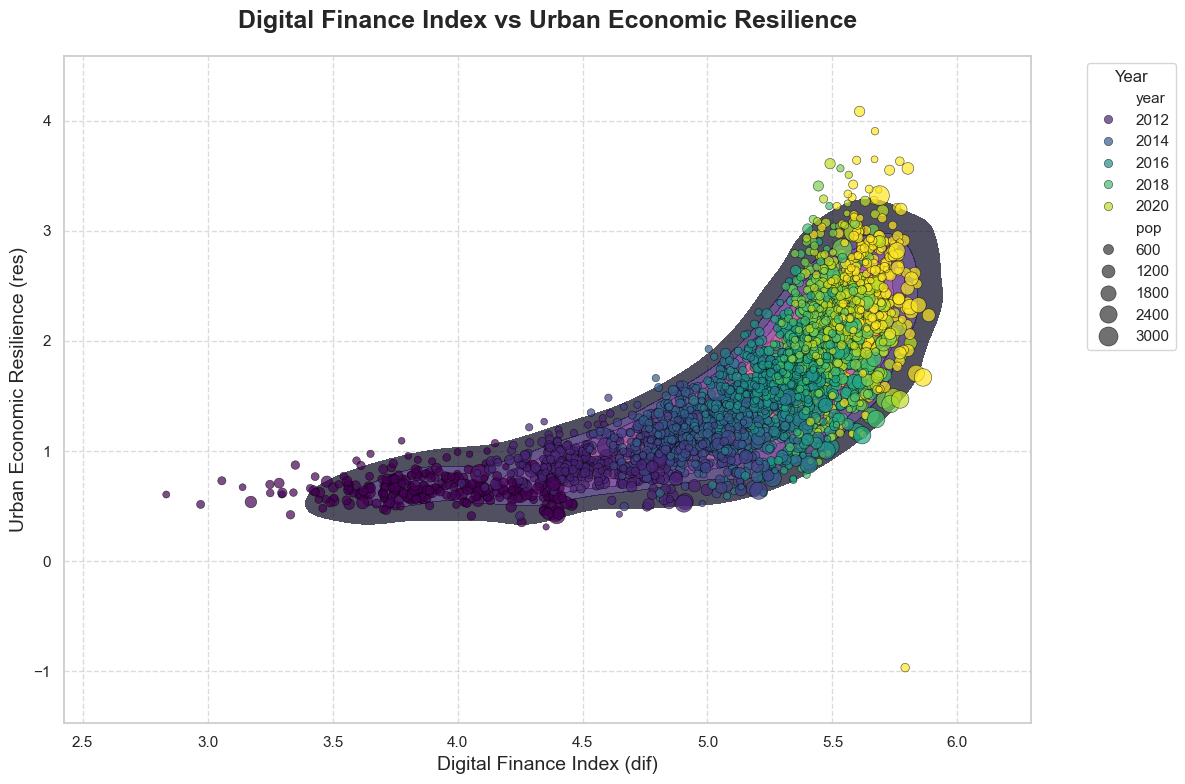

In [18]:
#  Digital Finance Index (dif) vs Urban Economic Resilience (res) with Contour
plt.figure(figsize=(12, 8))
sns.kdeplot(data=data, x='dif', y='res', cmap='magma', fill=True, alpha=0.7)
sns.scatterplot(data=data, x='dif', y='res', hue='year', size='pop', sizes=(20, 200), palette='viridis', alpha=0.7, edgecolor="black")
plt.title('Digital Finance Index vs Urban Economic Resilience', fontsize=18, weight='bold', pad=20)
plt.xlabel('Digital Finance Index (dif)', fontsize=14)
plt.ylabel('Urban Economic Resilience (res)', fontsize=14)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


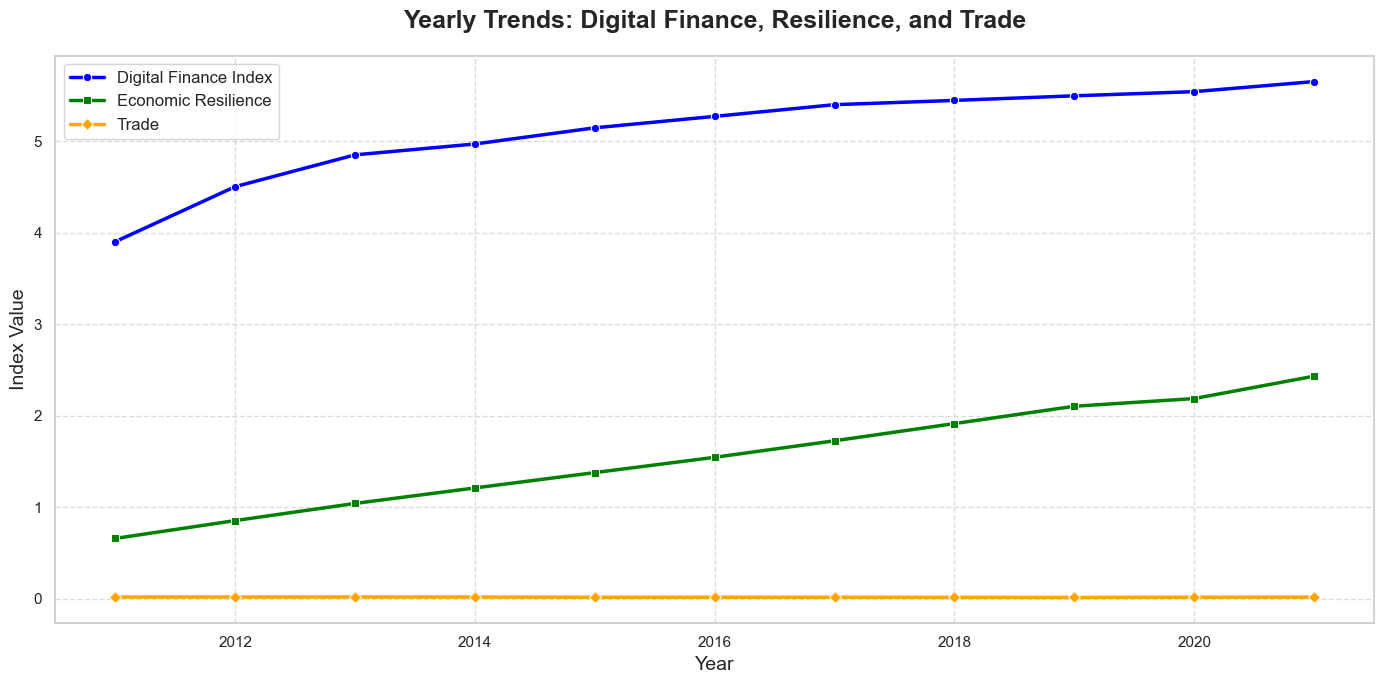

In [19]:
#  Yearly Trends: Comparative Analysis
avg_yearly = data.groupby('year').mean()
plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_yearly, x=avg_yearly.index, y='dif', marker='o', label='Digital Finance Index', linewidth=2.5, color='blue')
sns.lineplot(data=avg_yearly, x=avg_yearly.index, y='res', marker='s', label='Economic Resilience', linewidth=2.5, color='green')
sns.lineplot(data=avg_yearly, x=avg_yearly.index, y='trade', marker='D', label='Trade', linewidth=2.5, color='orange')
plt.title('Yearly Trends: Digital Finance, Resilience, and Trade', fontsize=18, weight='bold', pad=20)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Index Value', fontsize=14)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

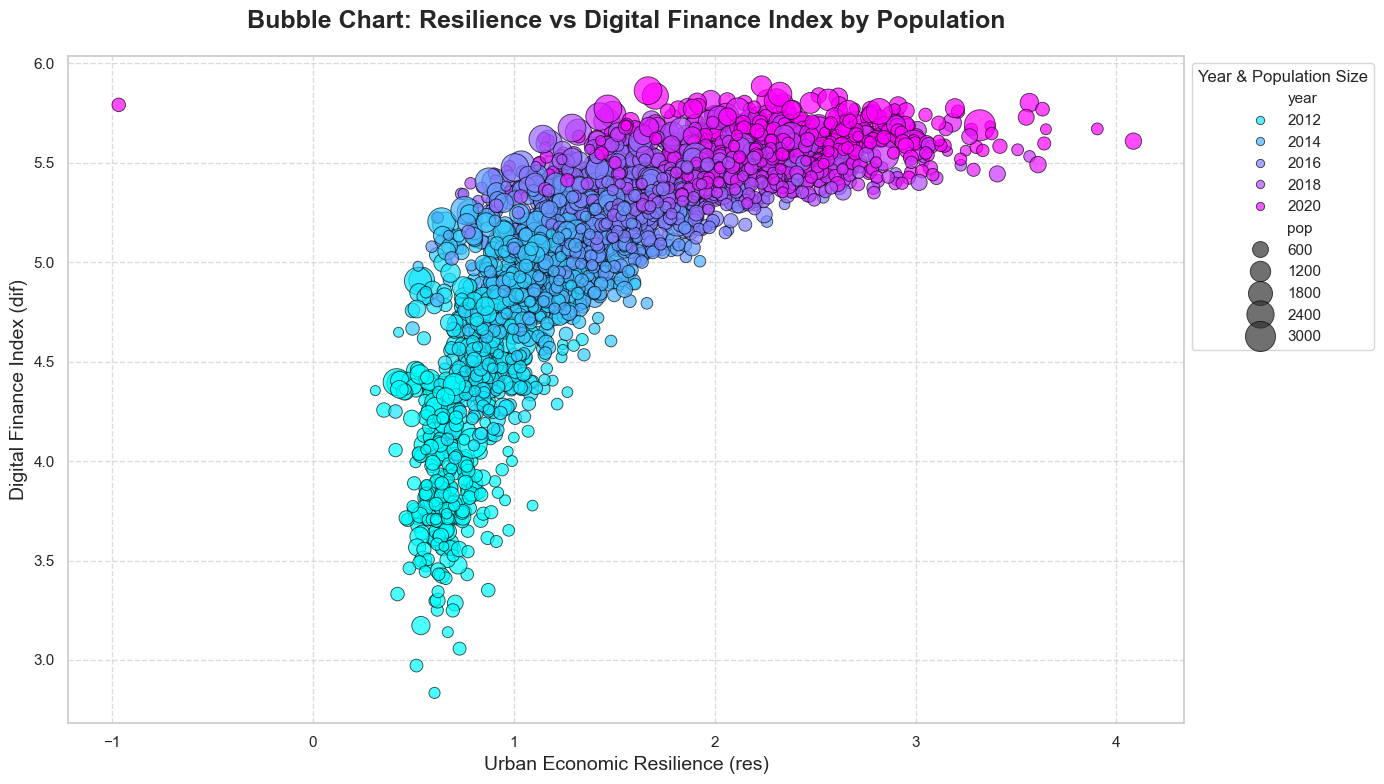

In [20]:
# Bubble Chart: Visualizing Key Interactions with Population
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data, x='res', y='dif', size='pop', hue='year', palette='cool', alpha=0.7, sizes=(50, 500), edgecolor='black')
plt.title('Bubble Chart: Resilience vs Digital Finance Index by Population', fontsize=18, weight='bold', pad=20)
plt.xlabel('Urban Economic Resilience (res)', fontsize=14)
plt.ylabel('Digital Finance Index (dif)', fontsize=14)
plt.legend(title='Year & Population Size', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

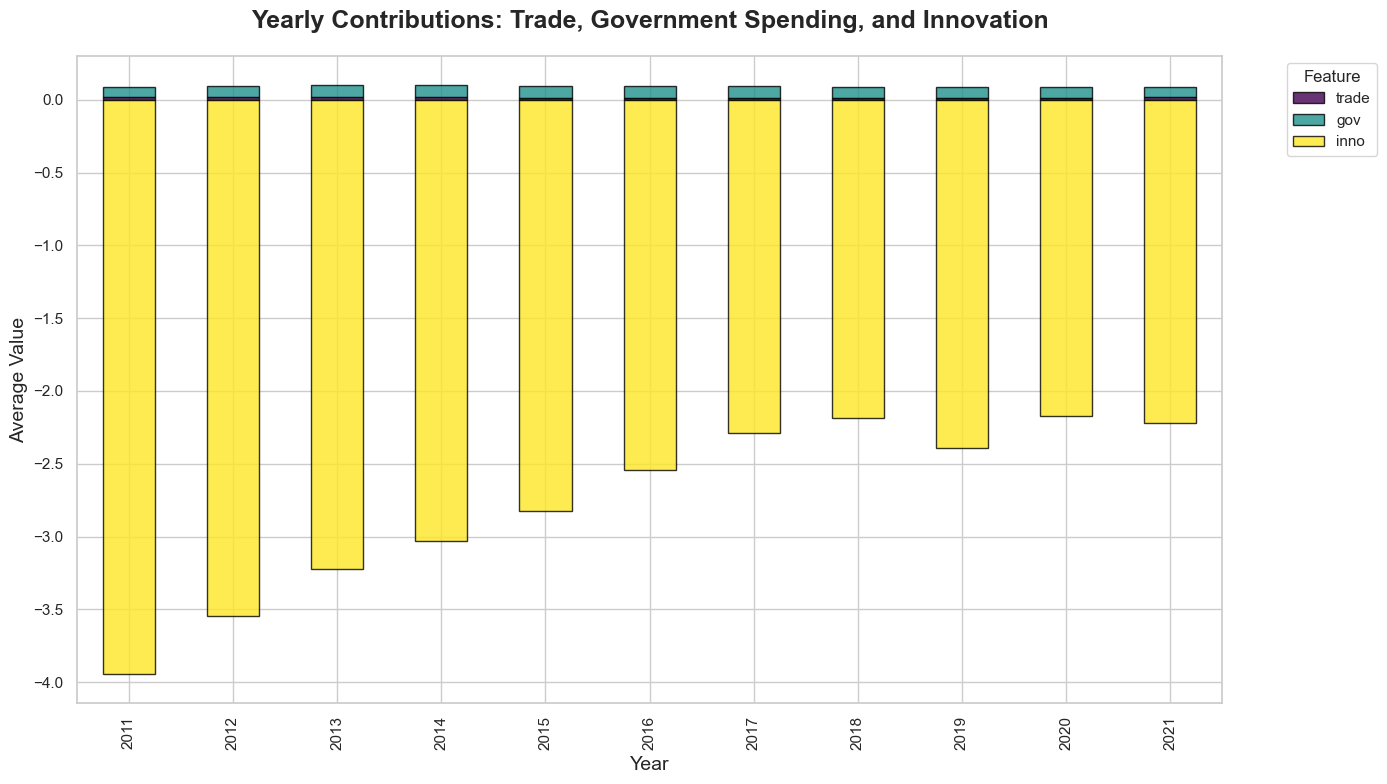

In [21]:
# Stacked Bar Plot: Exploring Yearly Contributions of Trade, Government Spending, and Innovation
stacked_data = data.groupby('year')[['trade', 'gov', 'inno']].mean()
stacked_data.plot(kind='bar', stacked=True, colormap='viridis', figsize=(14, 8), edgecolor='black', alpha=0.8)
plt.title('Yearly Contributions: Trade, Government Spending, and Innovation', fontsize=18, weight='bold', pad=20)
plt.ylabel('Average Value', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.legend(title='Feature', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

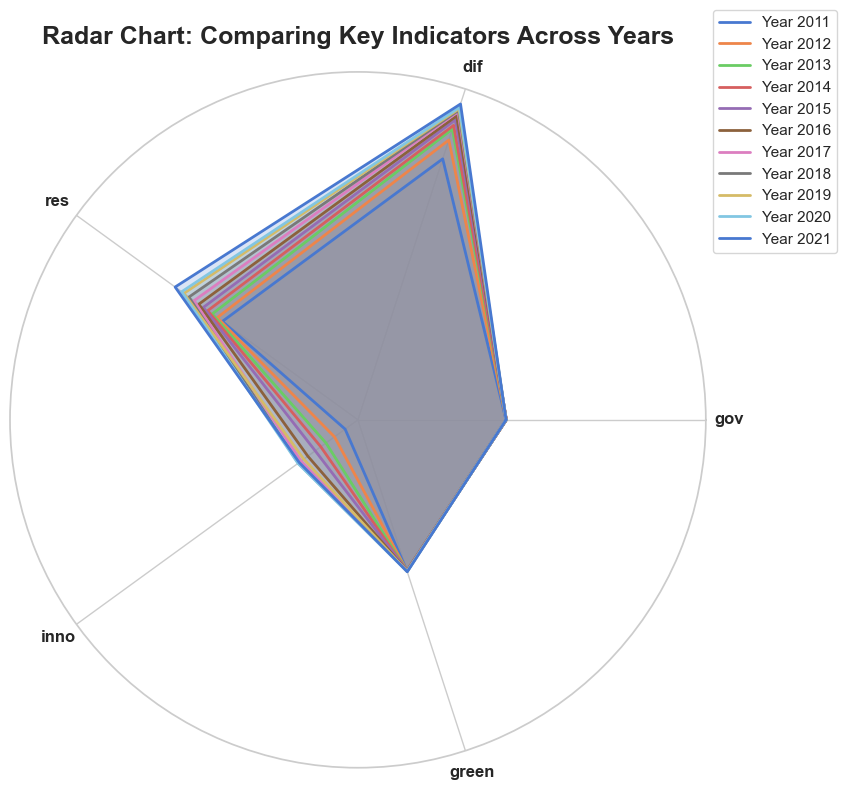

In [22]:
#  Radar Chart: Comparing Key Indicators by Year
from math import pi
years = data['year'].unique()
indicators = ['gov', 'dif', 'res', 'inno', 'green']
avg_data = data.groupby('year')[indicators].mean()
angles = np.linspace(0, 2 * np.pi, len(indicators), endpoint=False).tolist()
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))
for year in years:
    values = avg_data.loc[year].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, label=f'Year {year}')
    ax.fill(angles, values, alpha=0.2)

ax.set_yticks([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(indicators, fontsize=12, weight='bold')
plt.title('Radar Chart: Comparing Key Indicators Across Years', fontsize=18, weight='bold', pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.tight_layout()
plt.show()

### <i> Modeling </i>
### <i> Logistic Regression </i>

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Prepare data
X = data.drop(columns=['res', 'id', 'year']).fillna(0)  # Drop target and unnecessary columns
y = (data['res'] > data['res'].mean()).astype(int)  # Binary classification based on whether 'res' is above average

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Predictions
y_pred = lr_model.predict(X_test)

# Evaluate Model
print("Logistic Regression Results")
print("-" * 40)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))


Logistic Regression Results
----------------------------------------
Confusion Matrix:
 [[263  72]
 [132 158]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.79      0.72       335
           1       0.69      0.54      0.61       290

    accuracy                           0.67       625
   macro avg       0.68      0.66      0.66       625
weighted avg       0.68      0.67      0.67       625


Accuracy Score: 67.36%


### <i> Random Forest Classifier </i>

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate Model
print("Random Forest Classifier Results")
print("-" * 40)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))


Random Forest Classifier Results
----------------------------------------
Confusion Matrix:
 [[304  31]
 [ 30 260]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       335
           1       0.89      0.90      0.90       290

    accuracy                           0.90       625
   macro avg       0.90      0.90      0.90       625
weighted avg       0.90      0.90      0.90       625


Accuracy Score: 90.24%


### <i> XGBCLassifier </i>

In [28]:
from xgboost import XGBClassifier

# Train XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Evaluate Model
print("XGBoost Classifier Results")
print("-" * 40)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))


XGBoost Classifier Results
----------------------------------------
Confusion Matrix:
 [[303  32]
 [ 31 259]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91       335
           1       0.89      0.89      0.89       290

    accuracy                           0.90       625
   macro avg       0.90      0.90      0.90       625
weighted avg       0.90      0.90      0.90       625


Accuracy Score: 89.92%


### <i> Model's Comparisons </i>

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions for all models
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Create a comparison dictionary
model_comparison = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, lr_pred),
        accuracy_score(y_test, rf_pred),
        accuracy_score(y_test, xgb_pred),
    ],
    "Precision": [
        precision_score(y_test, lr_pred),
        precision_score(y_test, rf_pred),
        precision_score(y_test, xgb_pred),
    ],
    "Recall": [
        recall_score(y_test, lr_pred),
        recall_score(y_test, rf_pred),
        recall_score(y_test, xgb_pred),
    ],
    "F1-Score": [
        f1_score(y_test, lr_pred),
        f1_score(y_test, rf_pred),
        f1_score(y_test, xgb_pred),
    ]
}

# Convert to DataFrame for a clean display
import pandas as pd
comparison_df = pd.DataFrame(model_comparison)

# Display comparison
print(comparison_df)


                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression    0.6736   0.686957  0.544828  0.607692
1        Random Forest    0.9024   0.893471  0.896552  0.895009
2              XGBoost    0.8992   0.890034  0.893103  0.891566


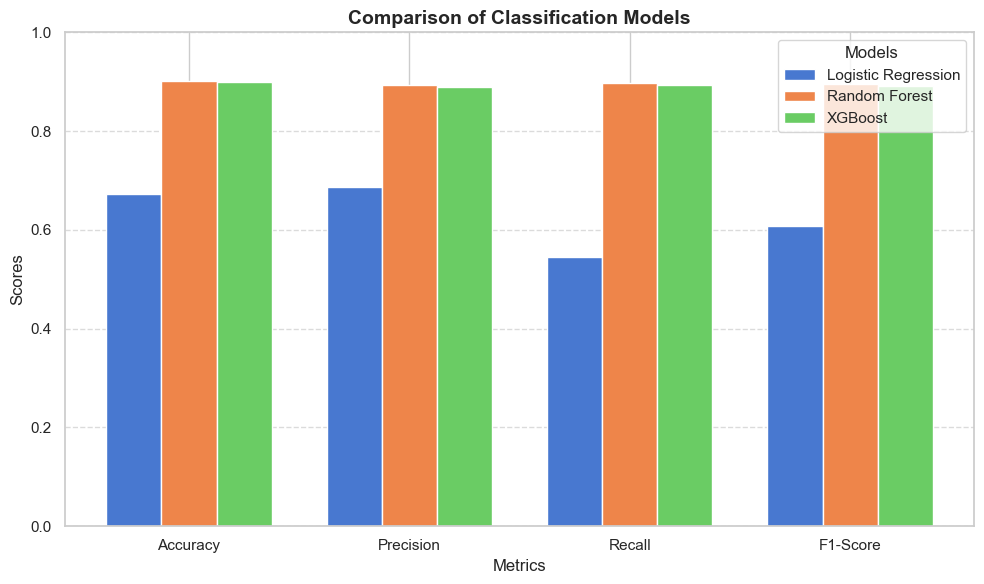

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Data for comparison
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
models = ["Logistic Regression", "Random Forest", "XGBoost"]

# Gather the values
metric_values = [
    [accuracy_score(y_test, lr_pred), precision_score(y_test, lr_pred), recall_score(y_test, lr_pred), f1_score(y_test, lr_pred)],
    [accuracy_score(y_test, rf_pred), precision_score(y_test, rf_pred), recall_score(y_test, rf_pred), f1_score(y_test, rf_pred)],
    [accuracy_score(y_test, xgb_pred), precision_score(y_test, xgb_pred), recall_score(y_test, xgb_pred), f1_score(y_test, xgb_pred)]
]

# Convert to numpy array for easier indexing
metric_values = np.array(metric_values)

# Bar width and positions
bar_width = 0.25
positions = np.arange(len(metrics))

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
for i, model in enumerate(models):
    plt.bar(positions + i * bar_width, metric_values[i], width=bar_width, label=model)

# Adding labels and title
plt.xticks(positions + bar_width, metrics)
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Scores", fontsize=12)
plt.title("Comparison of Classification Models", fontsize=14, fontweight='bold')
plt.ylim(0, 1)  # Scores are between 0 and 1
plt.legend(title="Models")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
